#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load data file
data = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/DataEncoding/atrium_SDA+ASE_regression_analysis/atrium_SDA+ASE_v1_2488_samples.csv', delimiter= " ")
pd.options.display.max_columns = None
data = data.dropna(axis=0)
#print(data)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   typicalGlazingRatio  2488 non-null   float64
 1   typicalWindowWidth   2488 non-null   int64  
 2   groundGlazingRatio   2488 non-null   float64
 3   groundWindowWidth    2488 non-null   int64  
 4   buildingDepth        2488 non-null   int64  
 5   balconyWidth         2488 non-null   int64  
 6   siteWidth            2488 non-null   int64  
 7   siteLength           2488 non-null   int64  
 8   floorDepth           2488 non-null   float64
 9   groundHeight         2488 non-null   int64  
 10  typicalHeight        2488 non-null   int64  
 11  levelNo              2488 non-null   int64  
 12  skylightArea         2488 non-null   float64
 13  netTotalArea         2488 non-null   int64  
 14  netGroundArea        2488 non-null   int64  
 15  buildingHeight       2488 non-null   i

In [ ]:
data.shape

(2488, 17)

In [ ]:
#data.drop(columns=["roofArea","buildingHeight"], inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   typicalGlazingRatio  2488 non-null   float64
 1   typicalWindowWidth   2488 non-null   int64  
 2   groundGlazingRatio   2488 non-null   float64
 3   groundWindowWidth    2488 non-null   int64  
 4   buildingDepth        2488 non-null   int64  
 5   balconyWidth         2488 non-null   int64  
 6   siteWidth            2488 non-null   int64  
 7   siteLength           2488 non-null   int64  
 8   groundHeight         2488 non-null   int64  
 9   typicalHeight        2488 non-null   int64  
 10  levelNo              2488 non-null   int64  
 11  skylightArea         2488 non-null   float64
 12  netTotalArea         2488 non-null   int64  
 13  groundSDA            2488 non-null   float64
 14  firstSDA             2488 non-null   float64
 15  groundASE            2488 non-null   f

In [ ]:
for colname, col in data.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

typicalGlazingRatio min_val 0.7 max_val 0.9
typicalWindowWidth min_val 2 max_val 4
groundGlazingRatio min_val 0.7 max_val 0.9
groundWindowWidth min_val 2 max_val 4
buildingDepth min_val 15 max_val 33
balconyWidth min_val 1 max_val 6
siteWidth min_val 40 max_val 80
siteLength min_val 40 max_val 80
groundHeight min_val 3 max_val 6
typicalHeight min_val 3 max_val 3
levelNo min_val 1 max_val 10
skylightArea min_val 100.0 max_val 2352.0
netTotalArea min_val 3472 max_val 115100
groundSDA min_val 24.1 max_val 100.0
firstSDA min_val 21.4 max_val 99.4
groundASE min_val 0.5 max_val 54.6
firstASE min_val 0.0 max_val 20.8


##Prepare Data

**NORMALIZE INPUTS**

In [ ]:
#same code as last time

#declare features
#X = data.iloc[:,1:-1]
X = data[["typicalWindowWidth", "groundGlazingRatio", "groundWindowWidth", "typicalGlazingRatio", "buildingDepth", "balconyWidth", "siteWidth", "siteLength", "groundHeight", "typicalHeight", "levelNo", "skylightArea", "netTotalArea"]]   

# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(2488, 13)


In [ ]:
#declare regression target
#y = data.loc[:,"wage_per_hour"].to_numpy()
y = data.loc[:, ["groundSDA", "firstSDA", "groundASE", "firstASE"]].to_numpy()

#y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
print(y_scaled)


(2488, 4)
[[0.36627141 0.32051282 0.15896488 0.05769231]
 [1.         0.23461538 0.49168207 0.25480769]
 [0.61791831 0.76666667 0.34195933 0.79326923]
 ...
 [0.7826087  0.26025641 0.29205176 0.19230769]
 [1.         0.44871795 0.40480591 0.29326923]
 [0.59025033 0.27435897 0.23475046 0.31730769]]


**SPLIT INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_test)
print(y_test)

TRAIN input (1990, 13) output (1990, 4)
TEST input (498, 13) output (498, 4)
[[-1.21050067e+00  1.39639361e+00  1.24953709e+00 ... -8.63272524e-01
   3.47751845e-01 -5.98756440e-01]
 [-1.21050067e+00  1.39639361e+00  1.24953709e+00 ...  8.71360039e-01
   2.73487919e-02  1.79531035e+00]
 [ 5.37565903e-03 -2.51396559e-02 -1.22763286e+00 ... -5.16346011e-01
   1.37016601e-03  2.88607973e-01]
 ...
 [-1.21050067e+00 -2.51396559e-02 -1.22763286e+00 ... -1.21019904e+00
   1.15597576e+00 -9.78460581e-01]
 [ 1.22125199e+00 -1.44667293e+00 -1.22763286e+00 ...  5.24433527e-01
  -1.05220744e+00  2.10670196e-01]
 [-1.21050067e+00 -2.51396559e-02 -1.22763286e+00 ... -1.55712555e+00
  -3.65217111e-01 -1.41300982e+00]]
[[0.26086957 0.16025641 0.24768946 0.29807692]
 [0.73781291 0.09615385 0.33271719 0.14423077]
 [0.68511199 0.12307692 0.24029575 0.25480769]
 ...
 [1.         0.54102564 0.44362292 0.21634615]
 [0.79710145 0.19230769 0.1663586  0.29326923]
 [1.         0.92179487 0.48983364 0.65865385]]

#Build model

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [ ]:
# Instantiate a sequential model
#tf.seed(5)
#model.save()
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(32, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
  
# Add a dense layer with 1 value output
#model.add(tf.keras.layers.Dense(1, activation= "linear"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                448       
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 dense_62 (Dense)            (None, 16)                528       
                                                                 
 dense_63 (Dense)            (None, 16)                272       
                                                                 
 dense_64 (Dense)            (None, 16)                272       
                                                                 
 dense_65 (Dense)            (None, 8)                 136       
                                                                 
 dense_66 (Dense)            (None, 4)                

#Train model

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
50/50 [==============================] - 1s 5ms/step - loss: 0.1572 - val_loss: 0.1043
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0887 - val_loss: 0.0896
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0821 - val_loss: 0.0863
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0796 - val_loss: 0.0841
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0779 - val_loss: 0.0826
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0766 - val_loss: 0.0815
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0757 - val_loss: 0.0805
Epoch 8/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0748 - val_loss: 0.0801
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0743 - val_loss: 0.0794
Epoch 10/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0740 - val_loss: 0.0792
Epoch 11/

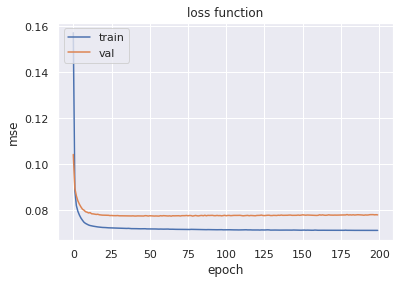

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.0731
mse_test: 0.07312831282615662


#Plot error


In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

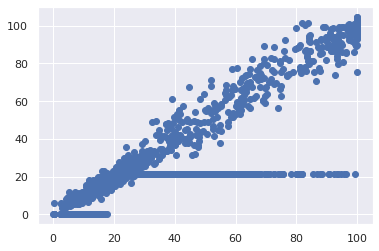

In [ ]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)

In [ ]:
#RADIATION PREDICTIONS
y_pred_01 = y_pred[:,0]
print(y_pred_01.shape)

(498,)


In [ ]:
#RADIATION TRUTH
y_truth_01 = y_truth[:,0]
print(y_truth_01.shape)

(498,)


[0.8 0.8 0.8 0.9 0.9 0.7 0.8 0.8 0.8 0.8 0.8 0.9 0.9 0.8 0.8 0.8 0.8 0.8
 0.8 0.8 0.7 0.9 0.9 0.8 0.8 0.9 0.8 0.8 0.8 0.9 0.7 0.7 0.7 0.9 0.8 0.7
 0.8 0.9 0.8 0.8 0.7 0.9 0.8 0.8 0.9 0.9 0.7 0.9 0.7 0.8 0.8 0.8 0.9 0.9
 0.8 0.9 0.8 0.7 0.8 0.8 0.7 0.8 0.7 0.7 0.8 0.7 0.8 0.7 0.8 0.9 0.7 0.9
 0.8 0.7 0.8 0.8 0.8 0.7 0.8 0.8 0.9 0.8 0.9 0.8 0.8 0.8 0.7 0.7 0.8 0.9
 0.8 0.8 0.8 0.7 0.7 0.7 0.8 0.7 0.8 0.7 0.7 0.7 0.7 0.8 0.8 0.9 0.7 0.8
 0.8 0.8 0.8 0.8 0.8 0.7 0.9 0.8 0.8 0.7 0.8 0.9 0.8 0.7 0.9 0.7 0.8 0.9
 0.8 0.7 0.8 0.8 0.9 0.7 0.7 0.8 0.8 0.7 0.8 0.8 0.8 0.7 0.9 0.9 0.8 0.8
 0.9 0.9 0.7 0.8 0.9 0.8 0.7 0.8 0.8 0.7 0.7 0.9 0.7 0.8 0.9 0.8 0.8 0.7
 0.8 0.8 0.9 0.7 0.8 0.8 0.8 0.7 0.7 0.8 0.8 0.9 0.7 0.7 0.7 0.7 0.7 0.8
 0.7 0.7 0.9 0.8 0.8 0.9 0.9 0.8 0.8 0.9 0.9 0.8 0.8 0.8 0.8 0.8 0.7 0.9
 0.8 0.8 0.9 0.7 0.8 0.9 0.8 0.7 0.7 0.7 0.7 0.8 0.8 0.7 0.8 0.7 0.8 0.7
 0.9 0.8 0.9 0.8 0.9 0.8 0.9 0.8 0.8 0.8 0.7 0.8 0.8 0.7 0.9 0.8 0.8 0.7
 0.8 0.8 0.8 0.7 0.8 0.8 0.8 0.8 0.8 0.8 0.7 0.7 0.

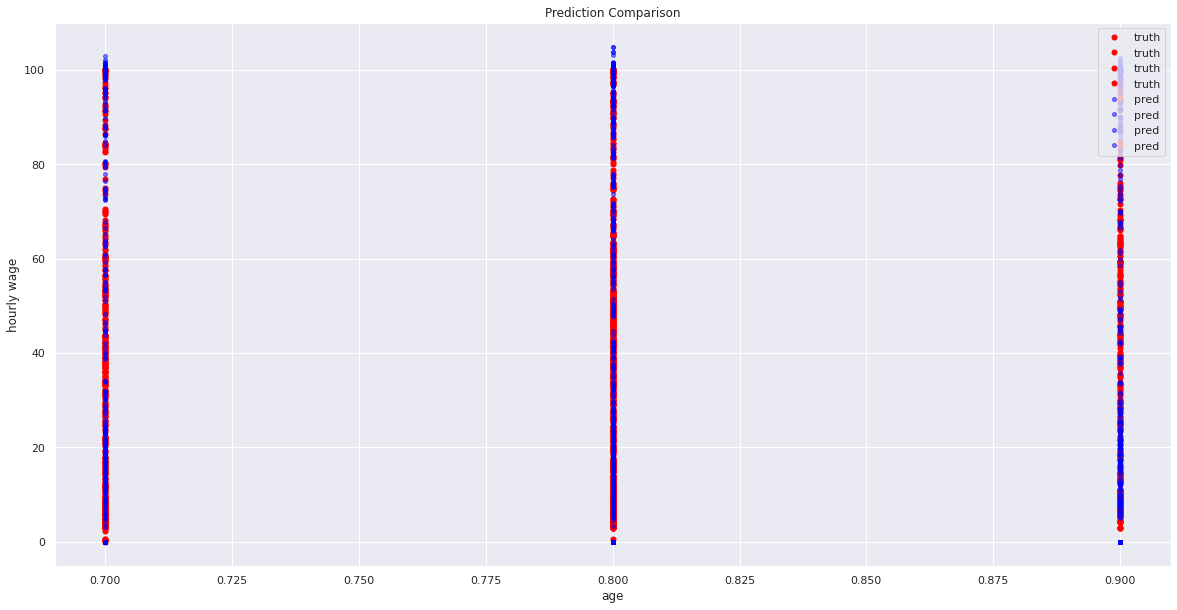

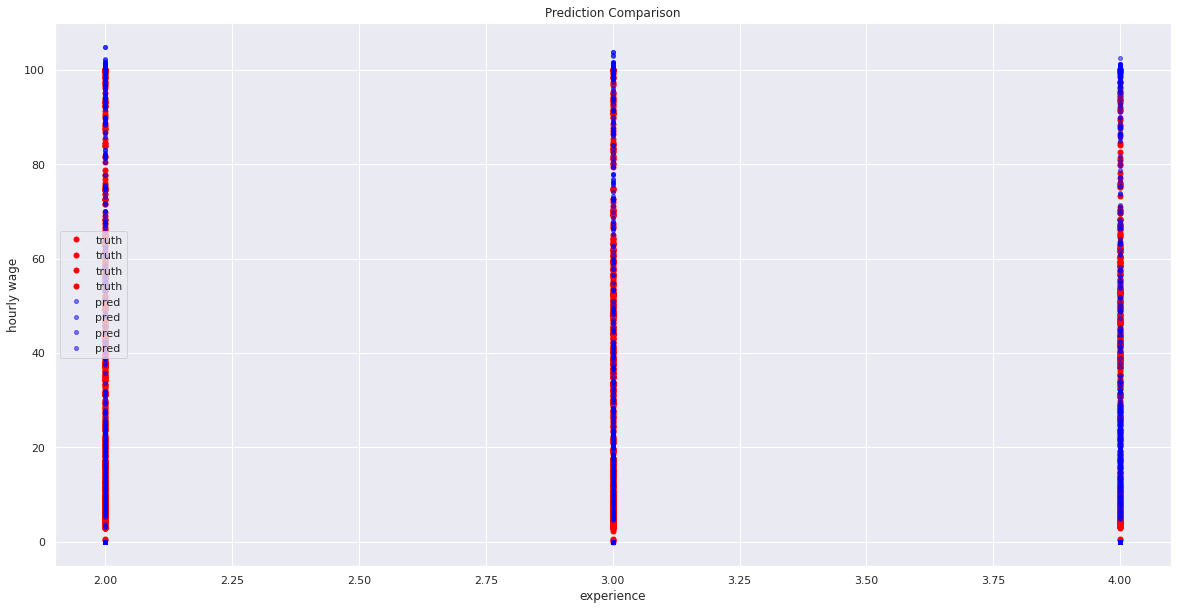

In [ ]:
age_test = (scalerX.inverse_transform(X_test)[:,3])
print(age_test)

exp_test = (scalerX.inverse_transform(X_test)[:,2])

plot_comparison(age_test, y_pred, y_truth, "age", "hourly wage")
plot_comparison(exp_test, y_pred, y_truth,  "experience", "hourly wage")

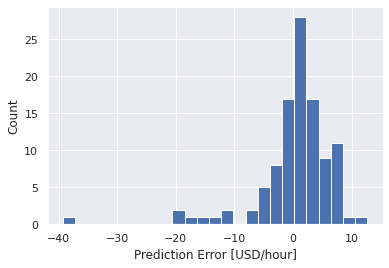

In [ ]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [USD/hour]')
_ = plt.ylabel('Count')